<a href="https://colab.research.google.com/github/HasnatAbdullah/FIFA_WC_2018_Supporter_Prediction_Twitter/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importing the data set

import pandas as pd # Importing pandas 
from google.colab import files
uploaded = files.upload()

Saving FIFA 2018.xlsx to FIFA 2018.xlsx


In [ ]:

# Reading the file by importing it in pandas data frame

import io
df = pd.read_csv(io.BytesIO(uploaded['FIFA 2018.xlsx']),index_col="No")
df.head()

KeyError: ignored

In [ ]:
# Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 356 to 240
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Used Name    376 non-null    object
 1   User Name    376 non-null    object
 2   Team         376 non-null    object
 3   City         175 non-null    object
 4   No of Tweet  376 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.6+ KB


Used Name        0
User Name        0
Team             0
City           201
No of Tweet      0
dtype: int64


<Figure size 720x432 with 0 Axes>

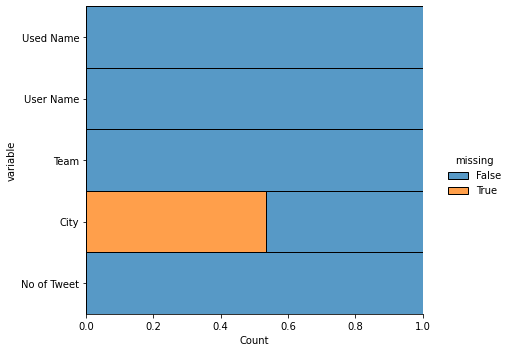

In [ ]:
# Checking the missing values

print(df.isnull().sum())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.displot(data=df.isnull().melt(value_name="missing"),hue="missing",y="variable",multiple="fill",aspect=1.25)

In [ ]:
# Checking dplicate cases

df.duplicated(subset=None,keep="first").sum()

0

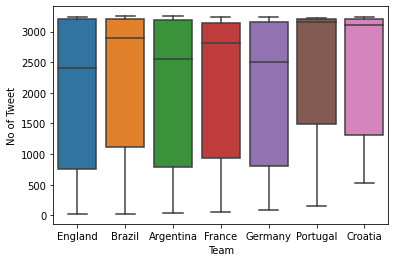

In [ ]:
# Checking the Outlier in Number of Tweets variable of each team
sns.boxplot(data=df,y=df["No of Tweet"],x=df["Team"],whis=1.5)

Brazil       136
Argentina    107
France        42
Germany       31
England       28
Croatia       21
Portugal      11
Name: Team, dtype: int64


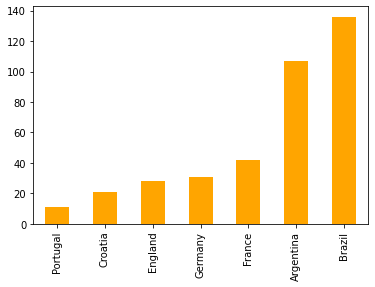

In [ ]:
# Checking the Team frequency

print(df.Team.value_counts())
df.Team.value_counts().sort_values().plot(kind="bar",color="orange")

Bangladesh    35
Chennai       20
Mumbai        17
Delhi         15
Australia     13
Thailand      11
Kolkata       11
Dhaka          9
Singapore      9
Auckland       7
Bangalore      5
Wellington     5
India          3
California     3
Hyderabad      2
Malaysia       2
Srilanka       2
Jakarta        2
England        1
Pakistan       1
Mexico         1
Ghana          1
Name: City, dtype: int64


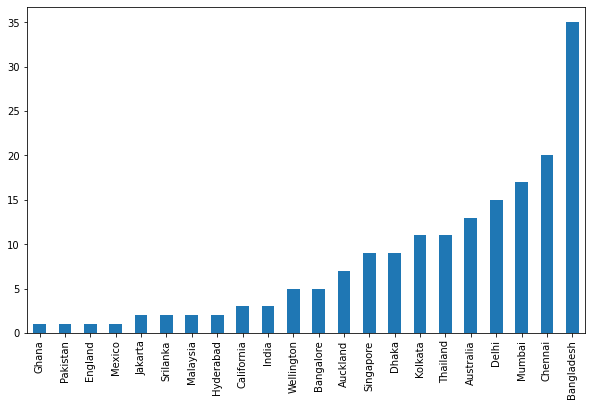

In [ ]:
# Checking the City frequency

print(df.City.value_counts())
plt.figure(figsize=(10,6))
df.City.value_counts().sort_values().plot(kind="bar")

In [ ]:
# Summary Statistic of Number of Tweets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No of Tweet,376.0,2141.441489,1169.52065,23.0,917.75,2859.5,3194.25,3249.0


In [ ]:
# Describing the object variables
df.describe(include="object").T

,count,unique,top,freq
Used Name,376,376,U_1,1
User Name,376,376,juhishah11,1
Team,376,7,Brazil,136
City,175,22,Bangladesh,35


In [ ]:
# Calculating the Summary Statistic if Number of Tweets Variable

mean=df["No of Tweet"].mean()
print("Mean is {0:.2f}".format(mean))
median=df["No of Tweet"].median()
print("Median is {0:.2f}".format(median))
mode=df["No of Tweet"].mode()
print("Mode is",mode)
variance=df["No of Tweet"].var()
print("Variance is {0:.2f}".format(variance))
standard_deviation=df["No of Tweet"].std()
print("Standard Deviation is {0:.2f}".format(standard_deviation))
minimum=df["No of Tweet"].min()
print("Minimum is {0:.2f}".format(minimum))
maximum=df["No of Tweet"].max()
print("Maximum is {0:.2f}".format(maximum))
skewness=df["No of Tweet"].skew()
print("Skewness is {0:.2f}".format(skewness))
kurtosis=df["No of Tweet"].kurtosis()
print("Kurtosis is {0:.2f}".format(kurtosis))

Mean is 2141.44
Median is 2859.50
Mode is 0    3210
dtype: int64
Variance is 1367778.55
Standard Deviation is 1169.52
Minimum is 23.00
Maximum is 3249.00
Skewness is -0.52
Kurtosis is -1.42


Brazil       136
Argentina    107
France        42
Germany       31
England       28
Croatia       21
Portugal      11
Name: Team, dtype: int64
Team
Portugal      26041
Croatia       50727
England       57121
Germany       62284
France        87815
Argentina    218403
Brazil       302791
Name: No of Tweet, dtype: int64
Team
Germany      2009.161290
England      2040.035714
Argentina    2041.149533
France       2090.833333
Brazil       2226.404412
Portugal     2367.363636
Croatia      2415.571429
Name: No of Tweet, dtype: float64


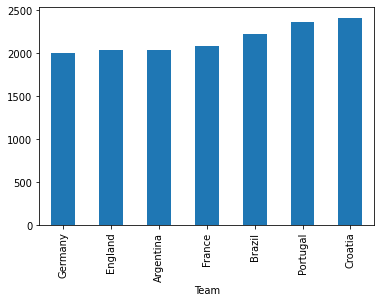

In [ ]:
# Calculating Average Tweets of each Team supporters

import seaborn as sns
df.groupby(df["Team"])["No of Tweet"].mean().sort_values().plot(kind="bar")
print(df.Team.value_counts())
print(df.groupby(df["Team"])["No of Tweet"].sum().sort_values())
print(df.groupby(df["Team"])["No of Tweet"].mean().sort_values())

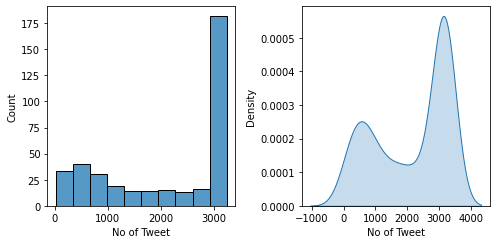

In [ ]:
# Checking the Distribution of Number of Tweets variable


plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data=df["No of Tweet"],ax=axes[0])
sns.kdeplot(data=df["No of Tweet"],ax=axes[1],shade=True)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


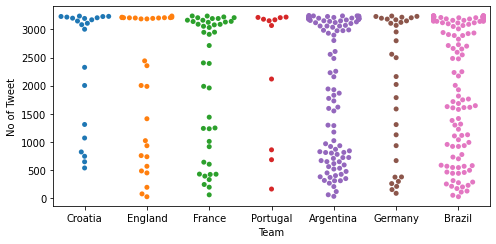

In [ ]:
sns.swarmplot(x=df["Team"],y=df["No of Tweet"])

No of Tweet                                                   \
                count         mean          std    min     25%     50%   
Team                                                                     
Argentina       107.0  2041.149533  1192.820779   30.0   788.5  2557.0   
Brazil          136.0  2226.404412  1135.842695   24.0  1123.0  2900.5   
Croatia          21.0  2415.571429  1067.602387  535.0  1309.0  3110.0   
England          28.0  2040.035714  1254.663640   23.0   750.0  2398.0   
France           42.0  2090.833333  1190.346228   57.0   937.5  2813.5   
Germany          31.0  2009.161290  1221.600046   84.0   799.0  2498.0   
Portugal         11.0  2367.363636  1209.637324  160.0  1488.0  3155.0   

                            
               75%     max  
Team                        
Argentina  3184.50  3249.0  
Brazil     3198.25  3247.0  
Croatia    3208.00  3238.0  
England    3207.50  3239.0  
France     3138.75  3240.0  
Germany    3162.50  3239.0  
Portugal   3196.00  3220.0

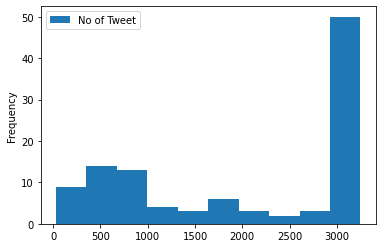

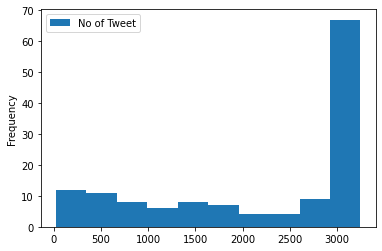

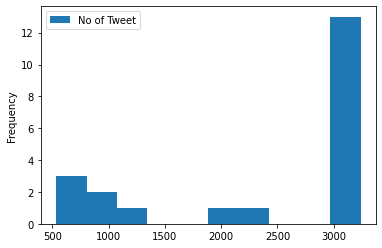

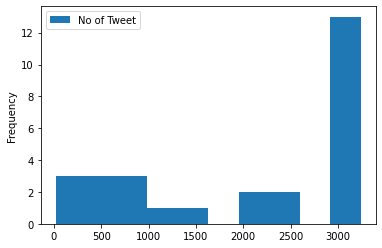

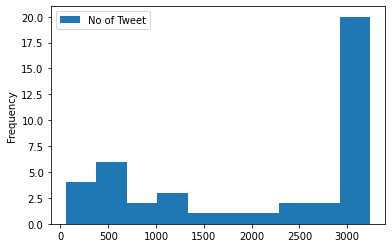

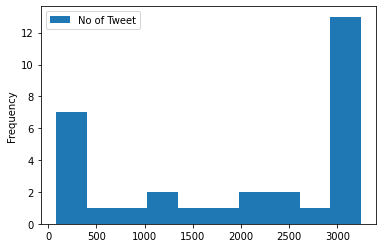

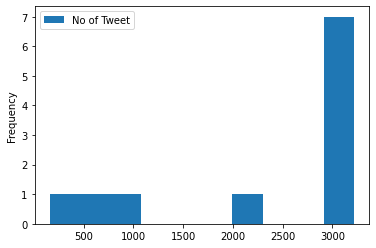

In [ ]:


df.groupby(df["Team"]).plot(kind="hist")


In [ ]:
df.groupby(df["Team"]).describe()

No of Tweet                                                   \
                count         mean          std    min     25%     50%   
Team                                                                     
Argentina       107.0  2041.149533  1192.820779   30.0   788.5  2557.0   
Brazil          136.0  2226.404412  1135.842695   24.0  1123.0  2900.5   
Croatia          21.0  2415.571429  1067.602387  535.0  1309.0  3110.0   
England          28.0  2040.035714  1254.663640   23.0   750.0  2398.0   
France           42.0  2090.833333  1190.346228   57.0   937.5  2813.5   
Germany          31.0  2009.161290  1221.600046   84.0   799.0  2498.0   
Portugal         11.0  2367.363636  1209.637324  160.0  1488.0  3155.0   

                            
               75%     max  
Team                        
Argentina  3184.50  3249.0  
Brazil     3198.25  3247.0  
Croatia    3208.00  3238.0  
England    3207.50  3239.0  
France     3138.75  3240.0  
Germany    3162.50  3239.0  
Portugal   3196.00  3220.0